In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
dm = pd.read_csv("./disney_movies.csv").dropna()
print(f"Data Shape for dm: {dm.shape}")

Data Shape for dm: (513, 6)


In [4]:
dm.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [5]:
dm.columns

Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross'],
      dtype='object')

## Which genre is the highest gross producing disney movie


In [9]:
dates = dm["release_date"]
dm['Release_Dates']=pd.to_datetime(dates)
dm['RYears'] = dm['Release_Dates'].dt.strftime('%Y')
dm['gross'] = dm.apply(lambda g: g['inflation_adjusted_gross']/1000000, axis = 1)
dm['rel_years'] = dm.apply(lambda g: int(g['RYears']), axis = 1)

In [8]:
dm.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,Release_Dates,RYears,gross,rel_years
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937-12-21,1937,52.289533,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940-02-09,1940,21.882291,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940-11-13,1940,21.870908,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946-11-12,1946,10.785106,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950-02-15,1950,9.206087,1950


In [31]:
dm_genre_sum = dm[["genre", "gross"]].groupby("genre", as_index = False).sum()
dm_genre_sum
dm_genre_mean = dm[["genre", "gross"]].groupby("genre", as_index = False).mean()
dm_genre_mean

,genre,gross
0,Action,148.601246
1,Adventure,197.180078
2,Black Comedy,52.243492
3,Comedy,87.310639
4,Concert/Performance,57.410839
5,Documentary,12.718026
6,Drama,77.356071
7,Horror,25.069265
8,Musical,637.750689
9,Romantic Comedy,78.213256


In [28]:
sns.set()

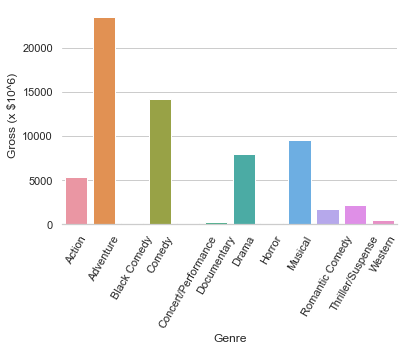

In [32]:
dm_genre_plot = sns.barplot(x="genre", y="gross", data=dm_genre_sum)
plt.xticks(rotation=60)
dm_genre_plot.set(xlabel='Genre', ylabel='Gross (x $10^6)')
sns.set_style("whitegrid")
sns.despine(left=True)
sns.axes_style({'font.family': ['Times']})
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 3.5})
plt.show()

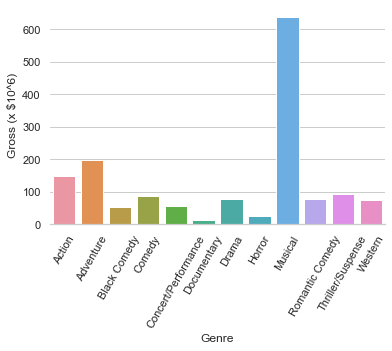

In [33]:
dm_genre_plot = sns.barplot(x="genre", y="Mean gross", data=dm_genre_mean)
plt.xticks(rotation=60)
dm_genre_plot.set(xlabel='Genre', ylabel='Gross (x $10^6)')
sns.set_style("whitegrid")
sns.despine(left=True)
sns.axes_style({'font.family': ['Times']})
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 3.5})
plt.show()

1. The highest gross producing genre from the 1930s are Adventure movies
2. Comedy and Musical genres are the second and third highest gross producing disney movies.
3. Whereas if you compare the gross mean, the musical genre has the highest average gross intake. 